<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/UAS/Google%20Colab/Nella_Aprilia_1103210185_MNIST_FASHION%E2%80%8B___CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***UAS MACHINE LEARNING***

Nama: Nella Aprilia

NIM: 1103210185

Dataset: MNIST FASHION​

Model: CNN

**1. Import library yang digunakan**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**2. kumpulan data**

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


**3. Normalisasi gambar**

In [15]:
train_images, test_images = train_images / 255.0, test_images / 255.0


**4. Bentuk ulang gambar untuk menambahkan saluran warna**

In [16]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

**5. Tentukan nama kelas**

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**6. Tampilkan beberapa gambar**

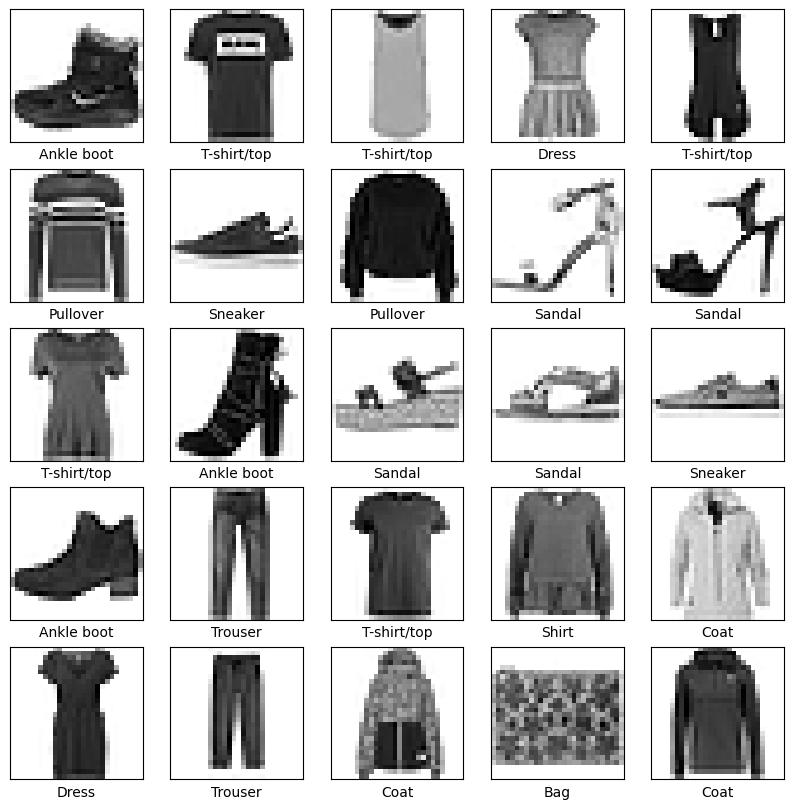

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


**7. Membangun Arsitektur CNN**

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**8. Kompilasi model**

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**9. Melatih model**

In [21]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.4898 - accuracy: 0.8187 - val_loss: 0.3697 - val_accuracy: 0.8656
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3167 - accuracy: 0.8841 - val_loss: 0.3250 - val_accuracy: 0.8804
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2707 - accuracy: 0.9002 - val_loss: 0.3138 - val_accuracy: 0.8866
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2406 - accuracy: 0.9112 - val_loss: 0.2673 - val_accuracy: 0.8979
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2156 - accuracy: 0.9195 - val_loss: 0.2569 - val_accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1951 - accuracy: 0.9289 - val_loss: 0.2466 - val_accuracy: 0.9129
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1793 - accuracy: 0.9332 - val_loss: 0.2488 -

**10. Evaluasi Model**

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 5s - loss: 0.2975 - accuracy: 0.9114 - 5s/epoch - 16ms/step
Test accuracy: 91.14%


**11. Menampilkan hasil pelatihan**

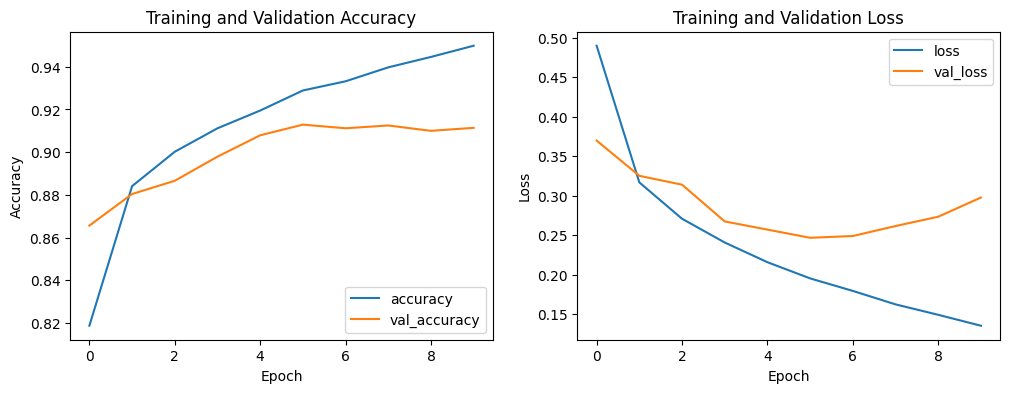

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**12. Prediksi label**

In [24]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


**13. Laporan klasifikasi**

In [25]:
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.89      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.88      0.87      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.85      0.88      0.86      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.79      0.69      0.73      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**14.  Confusion matrix**

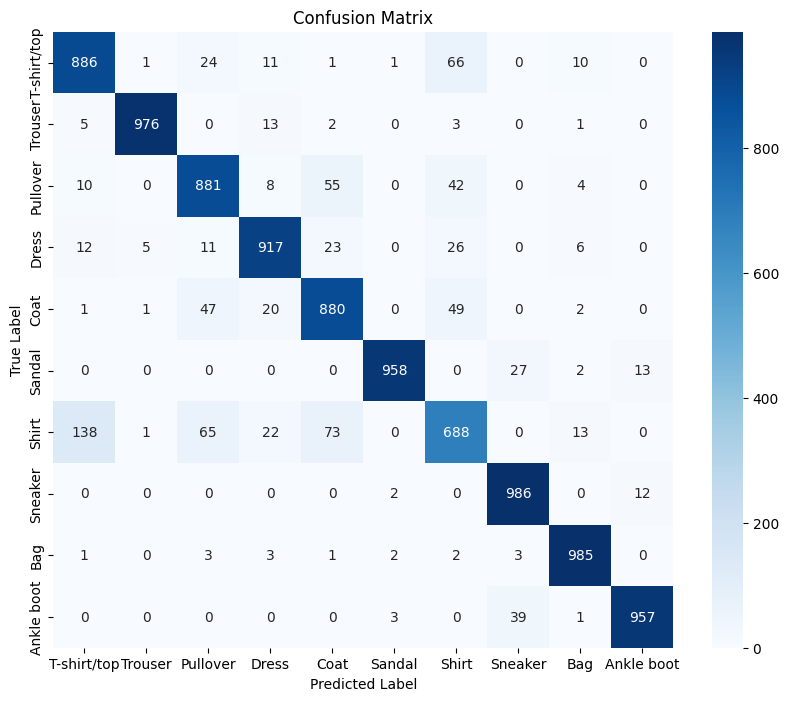

In [26]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()